In [29]:
from google.colab import files
uploaded = files.upload()

Saving kenya_roads.dbf to kenya_roads.dbf
Saving Kenya_roads.doc to Kenya_roads.doc
Saving kenya_roads.sbn to kenya_roads.sbn
Saving kenya_roads.sbx to kenya_roads.sbx
Saving kenya_roads.shp to kenya_roads.shp
Saving kenya_roads.shx to kenya_roads.shx


**Mapping Geographical Data in Python Refined**

In [30]:
from google.colab import files
uploaded = files.upload()

Saving kenya_forests.dbf to kenya_forests.dbf
Saving Kenya_forests.doc to Kenya_forests.doc
Saving kenya_forests.sbn to kenya_forests.sbn
Saving kenya_forests.sbx to kenya_forests.sbx
Saving kenya_forests.shp to kenya_forests.shp
Saving kenya_forests.shx to kenya_forests.shx


**Kenyan Counties**

In [12]:
from google.colab import files
uploaded = files.upload()

Saving County.dbf to County.dbf
Saving County.prj to County.prj
Saving County.sbn to County.sbn
Saving County.sbx to County.sbx
Saving County.shp to County (1).shp
Saving County.shp.xml to County.shp.xml
Saving County.shx to County.shx


In [19]:
from google.colab import files
uploaded = files.upload()

Saving kenya_major_towns.dbf to kenya_major_towns.dbf
Saving Kenya_major_towns.doc to Kenya_major_towns.doc
Saving kenya_major_towns.sbn to kenya_major_towns.sbn
Saving kenya_major_towns.sbx to kenya_major_towns.sbx
Saving kenya_major_towns.shp to kenya_major_towns.shp
Saving kenya_major_towns.shx to kenya_major_towns.shx


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
! pip install geopandas

In [0]:
! pip install googlemaps

In [0]:
import geopandas
from geopandas import GeoDataFrame, GeoSeries
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
from shapely.geometry import Point, Polygon
import numpy as np
import googlemaps
from datetime import datetime
plt.rcParams["figure.figsize"] = [8,6]

In [0]:
# importing libraries

import geopandas as gpd  # To create GeodataFrame
from shapely.geometry import Point, Polygon  # Shapely for converting latitude/longtitude to geometry
%matplotlib inline
import pandas as pd # Reading csv file

In [24]:
# Read in the data
county= gpd.read_file("County.shp")

# View the first five rows of the data

county.head()

,OBJECTID,AREA,PERIMETER,COUNTY3_,COUNTY3_ID,COUNTY,Shape_Leng,Shape_Area,geometry
0,1,5.677,15.047,2.0,1.0,Turkana,15.046838,5.676985,"POLYGON ((35.79593 5.34449, 35.79659 5.34468, ..."
1,2,6.177,11.974,3.0,2.0,Marsabit,11.974165,6.176831,"POLYGON ((36.05061 4.45622, 36.23184 4.45124, ..."
2,3,2.117,7.355,4.0,3.0,Mandera,7.355154,2.117196,"POLYGON ((41.62133 3.97673, 41.62272 3.97860, ..."
3,4,4.610,9.838,5.0,4.0,Wajir,9.838408,4.609589,"POLYGON ((39.31812 3.47197, 39.31956 3.47168, ..."
4,5,0.740,5.030,6.0,5.0,West Pokot,5.030271,0.740481,"POLYGON ((35.12745 2.62271, 35.12762 2.62302, ..."


In [15]:
type(county)

geopandas.geodataframe.GeoDataFrame

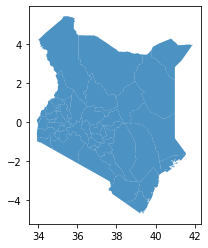

In [45]:
county.plot(alpha=0.8)

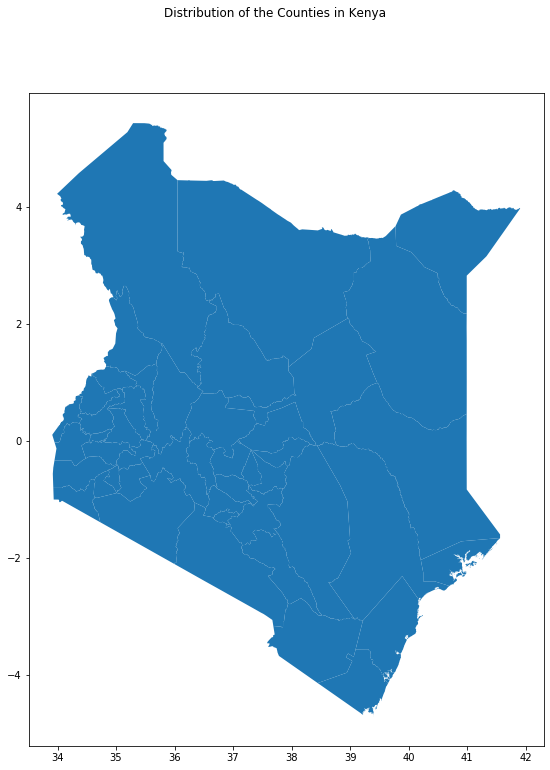

In [58]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = county.plot(ax=ax)
f.suptitle('Distribution of the Counties in Kenya')
plt.show()

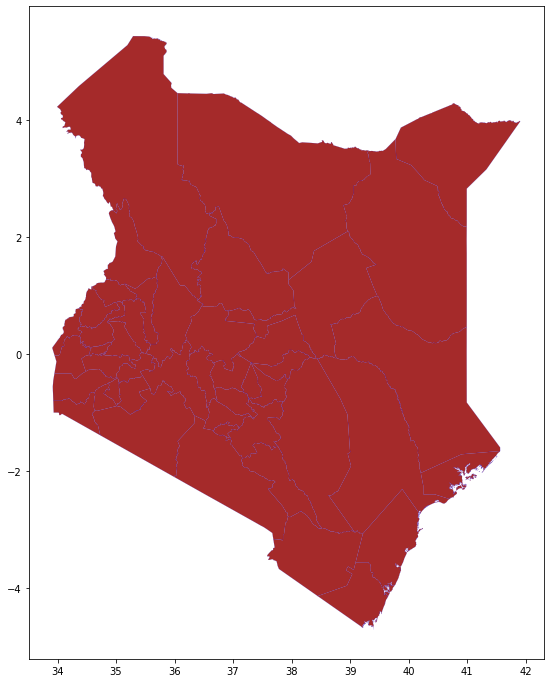

In [62]:
# Setup figure and axis
f, ax = plt.subplots(1, figsize=(12, 12))
# Add layer of polygons on the axis, set fill color (`facecolor`) and boundary
# color (`edgecolor`)
county.plot(linewidth=0.1, facecolor='brown', edgecolor='blue', ax=ax)
# Display
plt.show()

**Reading the Kenyan Major Towns Shape File**

In [21]:
# Read in the data
towns= gpd.read_file("kenya_major_towns.shp")

# View the first five rows of the data

towns.head()

,AREA,PERIMETER,KTOWNS_,KTOWNS_ID,TOWN_NAME,geometry
0,0.0,0.0,1,1,Moyale,POINT (39.06713 3.51502)
1,0.0,0.0,2,2,Mandera,POINT (41.84012 3.93175)
2,0.0,0.0,3,3,Wajir,POINT (40.06990 1.74579)
3,0.0,0.0,4,4,Marsabit,POINT (37.99985 2.32618)
4,0.0,0.0,5,5,Lodwar,POINT (35.60746 3.12534)


**Reading the Kenyan Forests Shape File**

In [32]:
# Read in the data
forests= gpd.read_file("kenya_forests.shp")

# View the first five rows of the data
forests.head()

,AREA,PERIMETER,FORESTS_,FORESTS_ID,LU,CFACTOR,geometry
0,0.005364,0.408104,2,372,F1,0.001,"POLYGON ((36.91195 2.72936, 36.90744 2.74295, ..."
1,0.000712,0.130134,3,93,F1,0.001,"POLYGON ((35.04576 2.35031, 35.04461 2.36388, ..."
2,0.010831,0.453610,4,509,F1,0.001,"POLYGON ((37.97448 2.33895, 37.97785 2.33215, ..."
3,0.000340,0.068525,5,101,F1,0.001,"POLYGON ((35.07730 2.28476, 35.07729 2.29041, ..."
4,0.012640,0.561492,6,360,F1,0.001,"POLYGON ((36.78270 2.12790, 36.78270 2.14263, ..."


**Reading the  Kenyan Roads Shape File**



In [34]:
# Read in the data
roads= gpd.read_file("kenya_roads.shp")

# View the first five rows of the data
roads.head()

,FNODE_,TNODE_,LPOLY_,RPOLY_,LENGTH,KENROAD_,KENROAD_ID,geometry
0,1,2,8,2,0.351,1,3,"LINESTRING (37.06003 3.32788, 37.05129 3.32780..."
1,3,4,3,9,0.220,2,4,"LINESTRING (40.02426 3.25320, 40.03122 3.25406..."
2,5,3,3,6,0.263,3,4,"LINESTRING (39.78555 3.33878, 39.78934 3.33775..."
3,3,6,9,6,0.021,4,4,"LINESTRING (40.02426 3.25320, 40.02669 3.24575..."
4,1,7,11,8,0.375,5,4,"LINESTRING (37.06003 3.32788, 37.05823 3.32332..."


**Creating a Base Map**

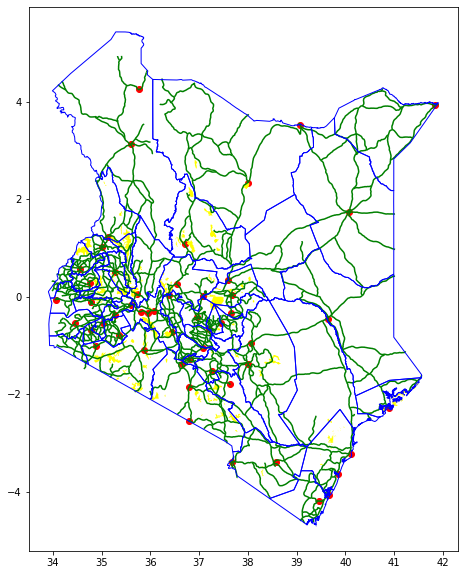

In [41]:
# Define a base map with County boundaries

ax = county.plot(figsize=(10,10), color='none', edgecolor='blue', zorder=3)

# Add Forests, Towns, and Riads to the Base Map
towns.plot(color='red', ax=ax)
forests.plot(color='yellow', markersize=2, ax=ax)
roads.plot(color='green', markersize=2, ax=ax)